Here I combine the 8 sub-fragments into one horizontally

Confirming the number of fragemnts per lot # They have equal numbers

In [1]:
import os
in_ = os.listdir('./fragments/')
#in_.sort()
print(in_)

['vesuvius-challenge-ink-detection', '7200-automated-unwrapping-and-stacking-of-vesuvius', '12600automated-unwrapping-and-stacking-of-vesuvius', '3600-automated-unwrapping-and-stacking-of-vesuvius', '14000automated-unwrapping-and-stacking-of-vesuvius', '1800-automated-unwrapping-and-stacking-of-vesuvius', '5400-automated-unwrapping-and-stacking-of-vesuvius', '10800automated-unwrapping-and-stacking-of-vesuvius', '9000automated-unwrapping-and-stacking-of-vesuvius']


In [2]:
import os

path_1800 = "./fragments/1800-automated-unwrapping-and-stacking-of-vesuvius/fragments/" #present
path_3600 = "./fragments/3600-automated-unwrapping-and-stacking-of-vesuvius/fragments/" #present
path_5400 = "./fragments/5400-automated-unwrapping-and-stacking-of-vesuvius/fragments/" #present
path_7200 = "./fragments/7200-automated-unwrapping-and-stacking-of-vesuvius/fragments/" #present
path_9000 = "./fragments/9000automated-unwrapping-and-stacking-of-vesuvius/fragments/" #present
path_10800 = "./fragments/10800automated-unwrapping-and-stacking-of-vesuvius/fragments/" #present
path_12600 = "./fragments/12600automated-unwrapping-and-stacking-of-vesuvius/fragments/" #present
path_14000 = "./fragments/14000automated-unwrapping-and-stacking-of-vesuvius/fragments/" #present

paths = [path_1800,path_3600,path_5400,path_7200,path_9000,path_10800,path_12600,path_14000]
print("1800 fragments : ",len(os.listdir(path_1800)))
print("3600 fragments : ",len(os.listdir(path_3600)))
print("5400 fragments : ",len(os.listdir(path_5400)))
print("7200 fragments : ",len(os.listdir(path_7200)))
print("9000 fragments : ",len(os.listdir(path_9000)))
print("10800 fragments : ",len(os.listdir(path_10800)))
print("14370 fragments : ",len(os.listdir(path_12600)))
print("12600 fragments : ",len(os.listdir(path_14000)),'\n\n')


fragments = os.listdir("./fragments/3600-automated-unwrapping-and-stacking-of-vesuvius/fragments")

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


import re

def extract_integer(s):
    match = re.search(r'\d+', s)
    if match:
        return int(match.group())
    else:
        return None

    
def get_fragment(i,fragment,path):
    path_image = path+fragment
    fragment_0_array = np.array(Image.open(path_image))#.astype(np.uint8))
    print(f"\tFragment {i} Original shape : ",fragment_0_array.shape)
    fragment_0_array = fragment_0_array[:6674,:,:] #use 6330*scale differece = 6674 as it is the vesuvius data size instead of 8524
    fragment_0 = Image.fromarray((fragment_0_array))
    print(f"\tFragment {i} shape : ",fragment_0.size)
    return fragment_0

for i, fragment in enumerate(fragments):
    integer_value = str(extract_integer(fragment))
    #print(fragment,'-----',integer_value.zfill(2)+'.tif')
    
    print('File index : ',integer_value,"---",fragment)
    # Open the image
    images = []
    for path in paths:
        images.append(get_fragment(i=integer_value,fragment=fragment,path=path))

    
    ##SAVING AS 5 FRAGMENTS### of size 2875 instead of 2727
    sequences = [k for k in range(2875,14376,2875)]
    print(sequences,'\n')
    full_fragment =  np.concatenate((images), axis=1)
    print("\tFull Fragment shape : ",full_fragment.shape)
    #plt.imshow(full_fragment)
    #%matplotlib inline

    images = []
    for m in range(0,5):
        print(sequences[m]-2875,sequences[m])
        section = full_fragment[:,sequences[m]-2875:sequences[m],:]
        images.append(section)
        os.makedirs(f"test/Scroll_1_{m}_Fragments/fragments/",exist_ok=True)
        to_save = Image.fromarray(section)
        to_save.save(f"test/Scroll_1_{m}_Fragments/fragments/"+integer_value.zfill(2)+'.tif')
        print(f"Saved {m} ")
        mask = np.ones(shape=(section.shape[0],section.shape[1]),dtype='uint8')*255 #[1],section.shape[0]
        mask[:1,:1] = 0
        to_save = Image.fromarray(mask)
        to_save.save(f"test/Scroll_1_{m}_Fragments/mask.png")

print("Save mask png of shape",mask.shape)

1800 fragments :  35
3600 fragments :  35
5400 fragments :  35
7200 fragments :  35
9000 fragments :  35
10800 fragments :  35
14370 fragments :  35
12600 fragments :  35 


File index :  25 --- fragment_25.tif
	Fragment 25 Original shape :  (18654, 1800, 3)
	Fragment 25 shape :  (1800, 6674)
	Fragment 25 Original shape :  (18654, 1800, 3)
	Fragment 25 shape :  (1800, 6674)
	Fragment 25 Original shape :  (18654, 1800, 3)
	Fragment 25 shape :  (1800, 6674)
	Fragment 25 Original shape :  (18654, 1800, 3)
	Fragment 25 shape :  (1800, 6674)
	Fragment 25 Original shape :  (18654, 1800, 3)
	Fragment 25 shape :  (1800, 6674)
	Fragment 25 Original shape :  (18654, 1800, 3)
	Fragment 25 shape :  (1800, 6674)
	Fragment 25 Original shape :  (18654, 1800, 3)
	Fragment 25 shape :  (1800, 6674)
	Fragment 25 Original shape :  (18654, 1776, 3)
	Fragment 25 shape :  (1776, 6674)
[2875, 5750, 8625, 11500, 14375] 

	Full Fragment shape :  (6674, 14376, 3)
0 2875
Saved 0 
2875 5750
Saved 1 
5750 8625
Save

Split fragments so that :
1. they have a size of 40 MB instead of 400MB 

2. They fit the size of vesuvius kaggle competition data

Competition data was size (2727,6330) while mine are (14376,8524)

How do I split them to fit vesuvius? size = (2875,6674)

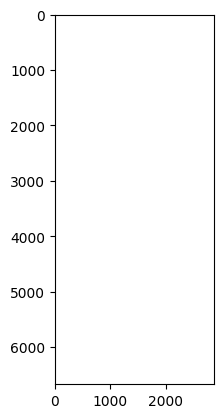

In [3]:
mask = np.ones(shape=section.shape,dtype='uint8')*255
#mask = mask[:1,:1] = 1
mask.shape
mask.dtype
mask[:1,:1] = 0
plt.imshow(mask)

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
#what are the dimensions of the image?
example = './test/a/mask.png'
example_array = np.array(cv2.imread(example, 0))
example_array.shape

(2727, 6330)

In [5]:
example_array.dtype

dtype('uint8')

In [6]:
generated_example = "./test/Scroll_1_2_Fragments/mask.png"
generated_example_array = np.array(cv2.imread(generated_example, 0))
generated_example_array.shape

(6674, 2875)

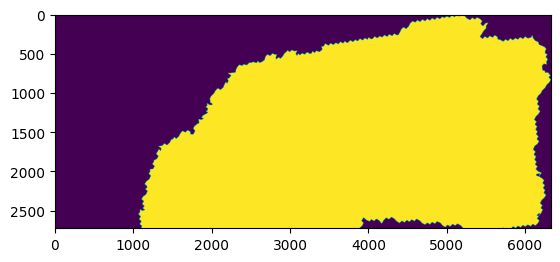

In [7]:
plt.imshow(example_array)

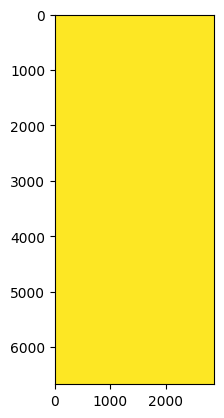

In [8]:
generated_example_array[:1,:1] = 1
plt.imshow(generated_example_array)#[2000:2010,6140:6180])

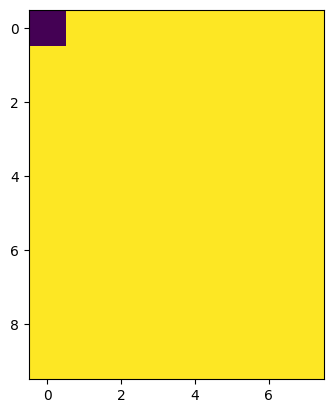

In [9]:
plt.imshow((generated_example_array[0:10,0:8] / 255).astype(int))

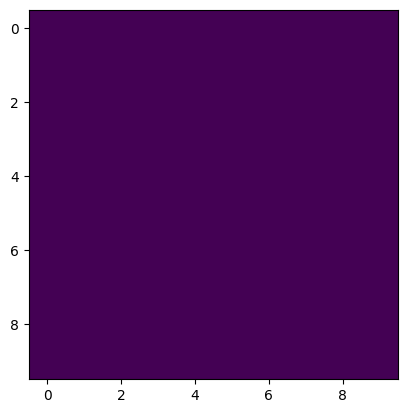

In [10]:
plt.imshow((example_array[2000:2010,6140:6150] / 255).astype(int))

In [11]:
example_array[2000:2010,6140:6150]

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255]], dtype=uint8)

In [12]:
generated_example_array[2000:2010,6140:6150]

array([], shape=(10, 0), dtype=uint8)